In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#读取CSV文件
csv_file_path = "C:/Users/Lenovo/Desktop/new_study/CNS/output/ASP_filtering.csv"
df = pd.read_csv(csv_file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Columns: 396 entries, SEQUENCE to LABEL
dtypes: float64(388), int64(7), object(1)
memory usage: 3.6+ MB


In [5]:
df.head()

,SEQUENCE,A,R,N,D,C,E,Q,I,K,...,_PolarizabilityD2050,_PolarizabilityD2075,_PolarizabilityD2100,_PolarizabilityD3001,_PolarizabilityD3025,_PolarizabilityD3050,_PolarizabilityD3075,_PolarizabilityD3100,MIC,LABEL
0,IKQLLHFFQRF,0.000,9.091,0.000,0.0,0.0,0.000,18.182,9.091,9.091,...,27.273,36.364,81.818,18.182,18.182,63.636,72.727,100.000,24.00,1
1,RLLRRLLRRLLRRLLRRLLR,0.000,50.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,...,50.000,70.000,95.000,5.000,20.000,45.000,65.000,100.000,32.00,1
2,GIGKFLHSAKKFGKAFVGEIMNS,8.696,0.000,4.348,0.0,0.0,4.348,0.000,8.696,17.391,...,73.913,82.609,95.652,17.391,21.739,43.478,52.174,91.304,128.00,1
3,LKRFLKWFKRF,0.000,18.182,0.000,0.0,0.0,0.000,0.000,0.000,27.273,...,9.091,9.091,45.455,18.182,27.273,54.545,72.727,100.000,8.00,1
4,KLFKRWKHLFR,0.000,18.182,0.000,0.0,0.0,0.000,0.000,0.000,27.273,...,18.182,18.182,81.818,9.091,27.273,45.455,63.636,100.000,31.25,1


In [6]:
#获取因变量标签
y=df["LABEL"]
#获得自变量标签
#保障数据格式是DataFrame,去除不需要进行特征提取的LABEL、SEQUENCE、MIC
X = df.drop(columns=["LABEL","SEQUENCE","MIC"])

In [7]:
print(X)

           A       R       N       D      C       E       Q      I       K  \
0      0.000   9.091   0.000   0.000  0.000   0.000  18.182  9.091   9.091   
1      0.000  50.000   0.000   0.000  0.000   0.000   0.000  0.000   0.000   
2      8.696   0.000   4.348   0.000  0.000   4.348   0.000  8.696  17.391   
3      0.000  18.182   0.000   0.000  0.000   0.000   0.000  0.000  27.273   
4      0.000  18.182   0.000   0.000  0.000   0.000   0.000  0.000  27.273   
...      ...     ...     ...     ...    ...     ...     ...    ...     ...   
1195  10.345   0.000   0.000   6.897  0.000  10.345   6.897  3.448  10.345   
1196   3.704   3.704  14.815   0.000  0.000   0.000   3.704  7.407   3.704   
1197   8.824   2.941   8.824  11.765  0.000   2.941   2.941  5.882   5.882   
1198   3.333   6.667  10.000   0.000  0.000   6.667   3.333  6.667   6.667   
1199  16.667   5.556   0.000   5.556  5.556   0.000   2.778  0.000   0.000   

          M  ...  _PolarizabilityD2001  _PolarizabilityD2025  \

In [8]:
# 初始化随机森林分类器
rf_classifier = RandomForestClassifier()

# 初始化一个空的数据框，用于存储特征重要性程度
importance_df = pd.DataFrame(columns=['Feature', 'Importance'])

In [9]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

#BorderlineSMOTE 是一种改进的 SMOTE 方法，它仅生成对分类边界（borderline）附近的样本。
#kind="borderline-1" 表示使用 Borderline-SMOTE 的第一种变体，即生成新的样本时，会考虑与少数类别样本接近但属于多数类别的样本。
sm =  BorderlineSMOTE(random_state= 42 ,kind="borderline-1")
X_resampled_train, y_resampled_train = sm.fit_resample(X_train,y_train)
#测试数据不能进行 不平衡的 BALANCE ！！这是因为这些技术会改变数据的分布，使其不再反映实际的情况
#X_resampled_test, y_resampled_test = sm.fit_resample(X_test,y_test)


In [11]:
#print(X_train)
#print(y_train)

In [10]:
print(X_resampled_train)
#print(y_resampled_train)
#print(X_resampled_test)
#print(y_resampled_test)

              A          R         N      D          C       E         Q  \
0     15.385000   0.000000  0.000000  7.692   0.000000   0.000  0.000000   
1     23.077000   0.000000  0.000000  0.000  15.385000   0.000  0.000000   
2      0.000000   0.000000  0.000000  0.000   5.556000   0.000  5.556000   
3      7.143000   0.000000  0.000000  7.143   7.143000   0.000  7.143000   
4      9.091000   2.273000  2.273000  2.273   2.273000  38.636  0.000000   
...         ...        ...       ...    ...        ...     ...       ...   
1579   7.000176  19.583851  0.000000  0.000   0.000000   0.000  3.500088   
1580   0.000000  14.912251  0.000000  0.000   0.000000   0.000  5.890323   
1581   7.033657   7.623957  3.516828  0.000   0.000000   0.000  0.000000   
1582   5.862871  19.073054  2.641688  0.000   2.641688   0.000  5.862871   
1583  10.778999   7.662771  8.224614  0.000   0.000000   0.000  2.554385   

              I          K         M  ...  _PolarizabilityD2001  \
0      0.000000   0.

In [17]:
#拟合模型
rf_classifier.fit(X_resampled_train,y_resampled_train)
#预测模型
y_pred = rf_classifier.predict(X_test)

# 初始化一个空的数据框，用于存储特征重要性程度
importance_df = pd.DataFrame({'Feature': X_resampled_train.columns, 'Importance': rf_classifier.feature_importances_})

# 根据重要性程度降序排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#计算特征重要性平均值
average_importance = np.mean(rf_classifier.feature_importances_)
roc_auc = roc_auc_score(y_test,rf_classifier.predict_proba(X_test)[:, 1])

print(importance_df)
print(f'Average Feature Importance: {average_importance}')

               Feature  Importance
307        _PolarityC3    0.063262
375  _PolarizabilityC3    0.060904
288  _NormalizedVDWVC3    0.060692
264      charge of all    0.044685
266    negative_charge    0.029911
..                 ...         ...
101                 QP    0.000000
246                 YQ    0.000000
238                 WF    0.000000
240                 WT    0.000000
44                  ND    0.000000

[393 rows x 2 columns]
Average Feature Importance: 0.002544529262086514


In [18]:
print(metrics.classification_report(y_pred,y_test,digits=6))
print(f'AUC=   {roc_auc:.6f}')

              precision    recall  f1-score   support

           0   0.980198  0.985075  0.982630       201
           1   0.921053  0.897436  0.909091        39

    accuracy                       0.970833       240
   macro avg   0.950625  0.941255  0.945861       240
weighted avg   0.970587  0.970833  0.970680       240

AUC=   0.995701


In [19]:
# 预测训练集
y_train_pred = rf_classifier.predict(X_resampled_train)

# 计算训练集的 ROC AUC
roc_auc_train = roc_auc_score(y_resampled_train, rf_classifier.predict_proba(X_resampled_train)[:, 1])

print(metrics.classification_report(y_train_pred, y_resampled_train, digits=6))
print(f'Train AUC=   {roc_auc_train:.6f}')

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       792
           1   1.000000  1.000000  1.000000       792

    accuracy                       1.000000      1584
   macro avg   1.000000  1.000000  1.000000      1584
weighted avg   1.000000  1.000000  1.000000      1584

Train AUC=   1.000000


In [22]:
# 精确值初值和N_final
accuracy_inital = 0.970297 
N_final = 2

# 初始化一个空的数据框，用于存储特征重要性程度
importance_final_df = pd.DataFrame(columns=['Feature', 'Importance'])
evaluation_final_df = pd.DataFrame(columns=['Metric', 'Value'])

for N in np.arange(1.5, 5.1, 0.1):
    # 根据重要性标准选择特征
    selected_features = importance_df[importance_df['Importance'] > N * average_importance]['Feature']
    print(f"The times N = {N}")
    print(f"Number of selected features: {len(selected_features)}")

    # 使用原始平平衡后的特征集合,根据重要性大于N倍平均值的特征进行再次筛选
    X_selected_train = X_resampled_train[selected_features]
    y_selected_train = y_resampled_train
    X_selected_test = X_test[selected_features]
    y_selected_test = y_test

    # 初始化随机森林分类器
    rf_classifier = RandomForestClassifier(criterion = "gini",random_state=0)

    #拟合模型
    rf_classifier.fit(X_selected_train, y_selected_train)
    #预测模型
    y_pred = rf_classifier.predict(X_selected_test)
    
    accuracy = accuracy_score(y_selected_test,y_pred)
    precision = precision_score(y_selected_test,y_pred)
    recall = recall_score(y_selected_test,y_pred)
    roc_auc = roc_auc_score(y_selected_test,rf_classifier.predict_proba(X_selected_test)[:, 1])

    if(accuracy > accuracy_inital):
        accuracy_inital = accuracy
        N_final = N;
        # 将指标添加到数据框
        importance_final_df = pd.DataFrame({'Feature': X_selected_train.columns, 'Importance': rf_classifier.feature_importances_})
        evaluation_final_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC'],'Value': [accuracy, precision, recall, roc_auc]})
        # 根据重要性程度降序排序
        importance_final_df = importance_final_df.sort_values(by='Importance', ascending=False)
        print(importance_df)
        print(metrics.classification_report(y_pred,y_selected_test,digits=6))
    print(f"----------------------------------------------------------------")

The times N = 1.5
Number of selected features: 50
               Feature  Importance
307        _PolarityC3    0.063262
375  _PolarizabilityC3    0.060904
288  _NormalizedVDWVC3    0.060692
264      charge of all    0.044685
266    negative_charge    0.029911
..                 ...         ...
101                 QP    0.000000
246                 YQ    0.000000
238                 WF    0.000000
240                 WT    0.000000
44                  ND    0.000000

[393 rows x 2 columns]
              precision    recall  f1-score   support

           0   0.980198  0.990000  0.985075       200
           1   0.947368  0.900000  0.923077        40

    accuracy                       0.975000       240
   macro avg   0.963783  0.945000  0.954076       240
weighted avg   0.974726  0.975000  0.974742       240

----------------------------------------------------------------
The times N = 1.6
Number of selected features: 47
----------------------------------------------------------------

In [23]:
print(f"The final N times is: {N_final}")
print(f"Number of importance final features: {len(importance_final_df)}")
print(importance_final_df)
print(evaluation_final_df)

The final N times is: 2.2000000000000006
Number of importance final features: 36
                       Feature  Importance
2            _NormalizedVDWVC3    0.152742
1            _PolarizabilityC3    0.130987
0                  _PolarityC3    0.088305
5                  _PolarityC2    0.051573
9                    _ChargeC1    0.049703
6                   _ChargeT23    0.040763
3                charge of all    0.040754
13                _ChargeD3100    0.038966
4              negative_charge    0.029184
21                   _ChargeC3    0.027597
30        _NormalizedVDWVD1100    0.027542
25                          KV    0.023979
27    _SolventAccessibilityT23    0.020302
18          _PolarizabilityT12    0.020281
14                _ChargeD3075    0.019816
8           _NormalizedVDWVT12    0.018545
24     _SolventAccessibilityC3    0.015801
34                           P    0.014827
33        _PolarizabilityD1100    0.014582
22                          GG    0.014409
10              

In [26]:
feature_selected_df

,_NormalizedVDWVC3,_PolarizabilityC3,_PolarityC3,_PolarityC2,_ChargeC1,_ChargeT23,charge of all,_ChargeD3100,negative_charge,_ChargeC3,...,_ChargeD3050,_SolventAccessibilityD3100,_ChargeT12,_PolarizabilityC2,vdW_volume,_ChargeD3025,RL,_PolarityD2075,E,_ChargeD3001
0,0.545,0.545,0.273,0.182,0.182,0.000,3,0.000,0,0.000,...,0.000,54.545,0.400,0.455,4.830000,0.000,0.00,27.273,0.000,0.000
1,0.500,0.500,0.500,0.000,0.500,0.000,10,0.000,0,0.000,...,0.000,0.000,0.526,0.500,5.065000,0.000,26.32,0.000,0.000,0.000
2,0.391,0.391,0.217,0.087,0.174,0.091,4,82.609,1,0.043,...,82.609,100.000,0.273,0.261,3.163913,82.609,0.00,82.609,4.348,82.609
3,0.818,0.818,0.455,0.000,0.455,0.000,5,0.000,0,0.000,...,0.000,0.000,0.600,0.182,5.483636,0.000,0.00,0.000,0.000,0.000
4,0.818,0.818,0.545,0.000,0.455,0.000,6,0.000,0,0.000,...,0.000,72.727,0.600,0.182,5.371818,0.000,0.00,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.172,0.172,0.103,0.207,0.103,0.357,-2,79.310,5,0.172,...,24.138,96.552,0.143,0.483,3.241724,10.345,0.00,68.966,10.345,10.345
1196,0.296,0.296,0.111,0.222,0.074,0.000,3,0.000,0,0.000,...,0.000,85.185,0.154,0.407,3.434444,0.000,0.00,70.370,0.000,0.000
1197,0.265,0.265,0.147,0.235,0.088,0.242,0,88.235,5,0.147,...,44.118,97.059,0.121,0.324,3.287353,29.412,0.00,58.824,2.941,29.412
1198,0.367,0.367,0.200,0.267,0.133,0.138,4,90.000,2,0.067,...,6.667,86.667,0.172,0.433,3.810333,90.000,0.00,80.000,6.667,6.667


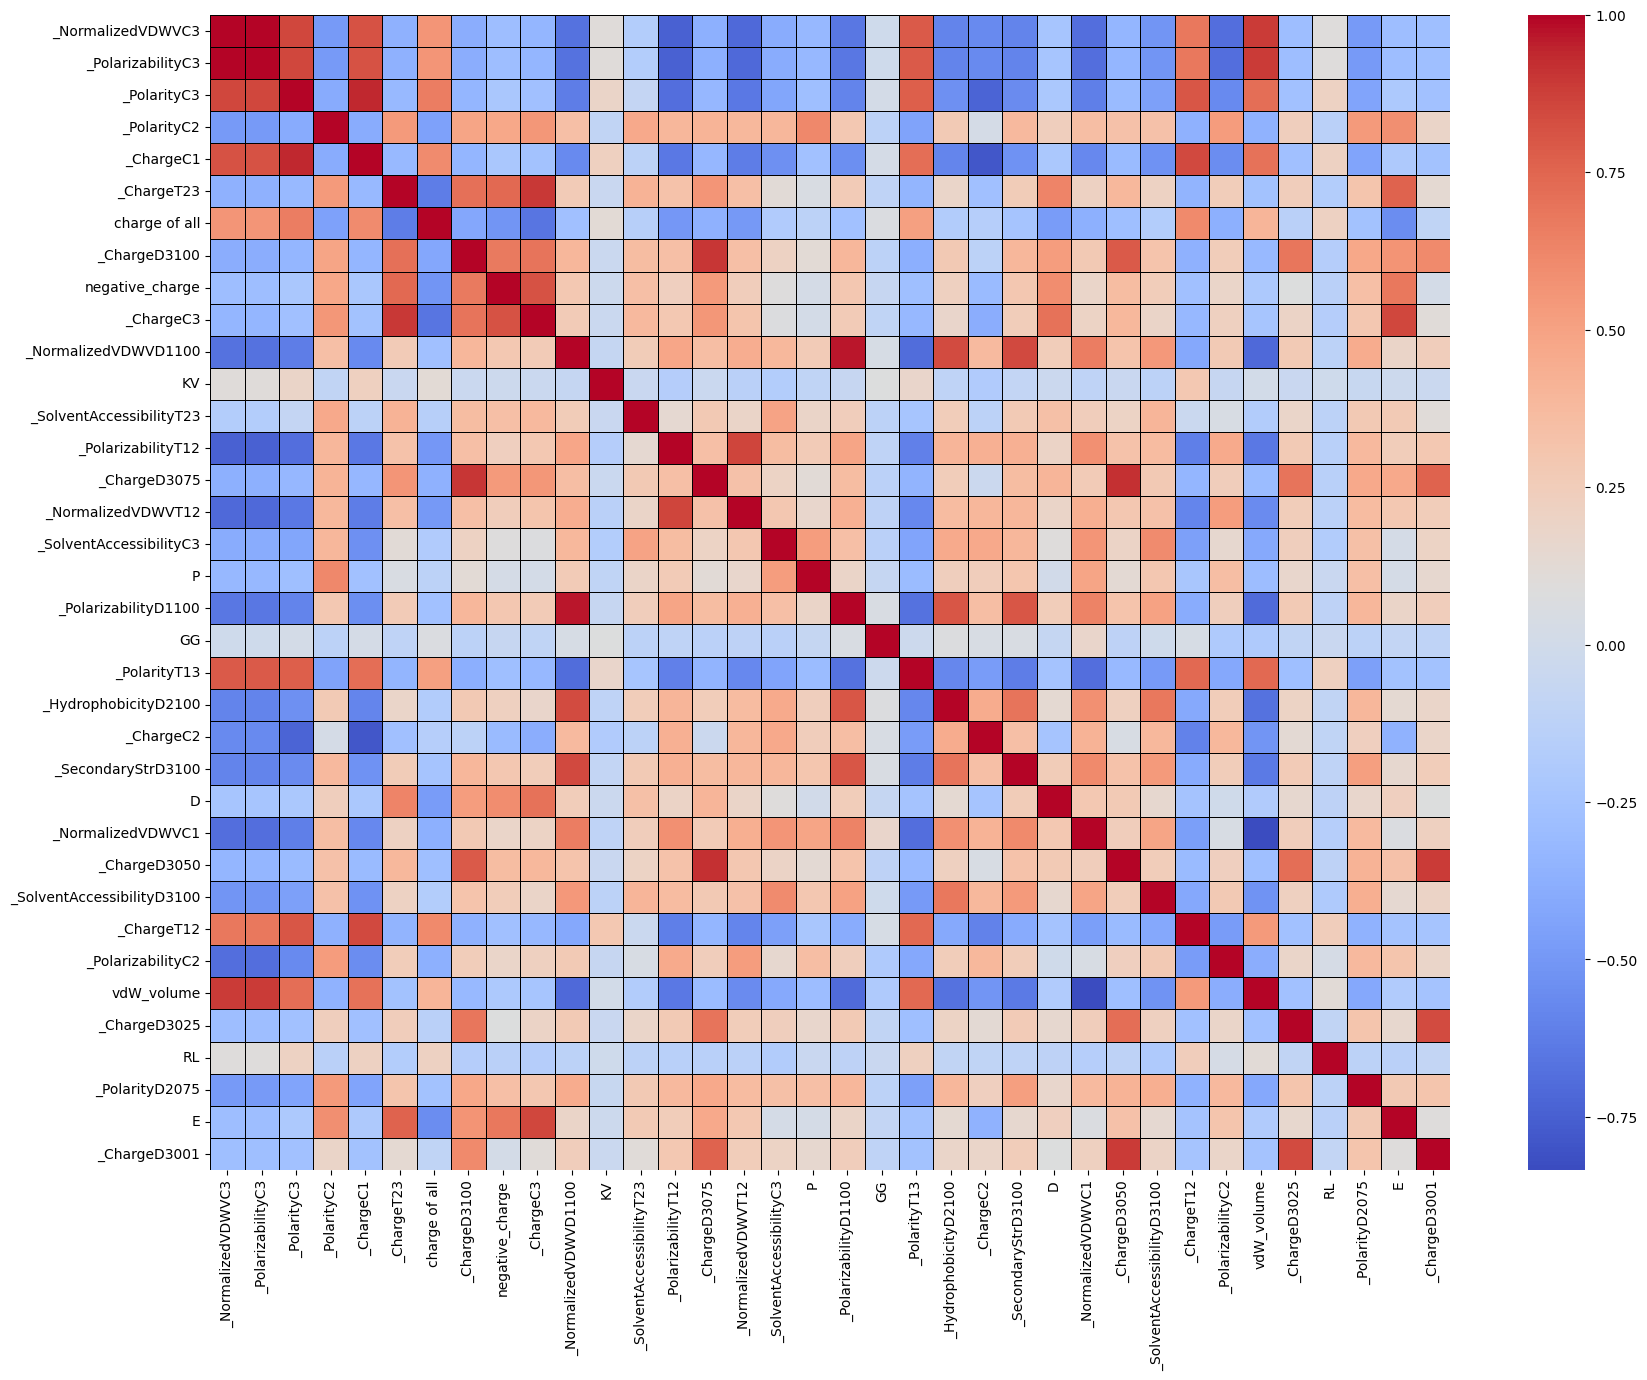

In [34]:
import seaborn as sns
import pandas as pd
import numpy as np

feature_selected_df = df[importance_final_df["Feature"]]

# 计算特征之间的相关性
corr = feature_selected_df.corr()

# 创建一个新的图形，你可以根据需要调整图形的大小
plt.figure(figsize=(20, 15))

# 绘制热力图
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',
            linewidths=0.5, # 添加边框
            linecolor='black') # 边框颜色

plt.savefig("C:/Users/Lenovo/Desktop/new_study/CNS/output/RandomForest_heatmap.png")
# 显示图形
plt.show()

In [35]:
# 保存结果到 CSV 文件
importance_final_df.to_csv("C:/Users/Lenovo/Desktop/new_study/CNS/output/RandomForest_importance.csv", index=False)
evaluation_final_df.to_csv("C:/Users/Lenovo/Desktop/new_study/CNS/output/RandomForest_evaluation.csv", index=False)

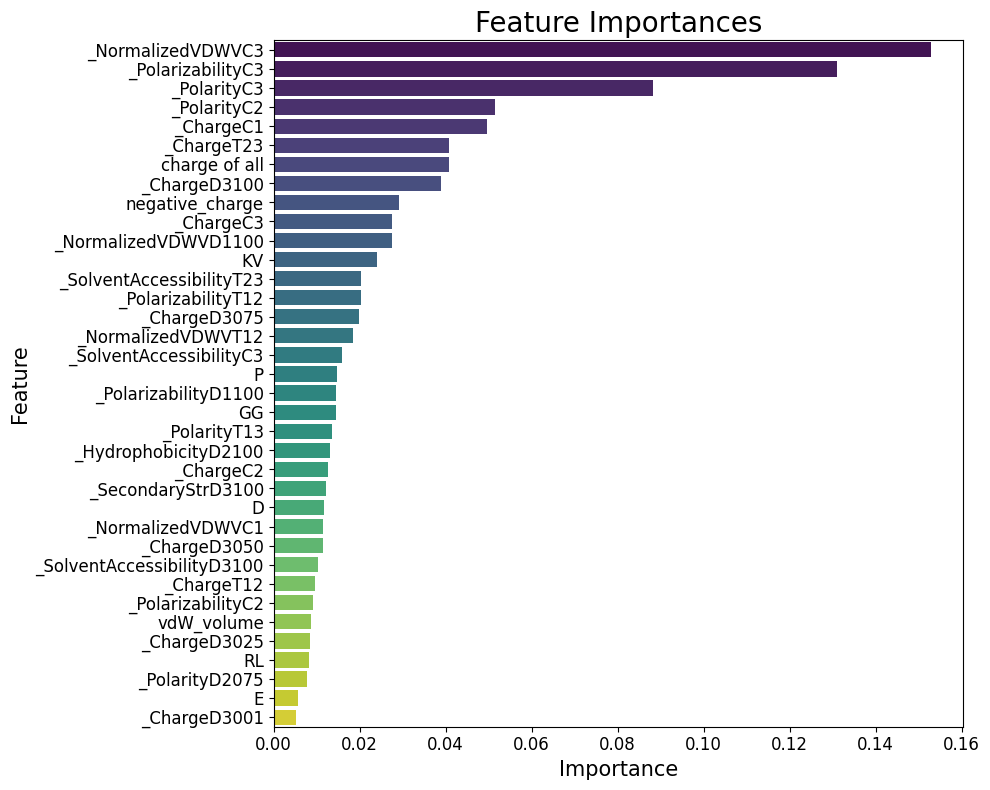

In [36]:
# 按照Importance列排序，大的值在上面
importance_final_df = importance_final_df.sort_values(by='Importance', ascending=False)

# 设置图形大小
plt.figure(figsize=(10, 8))

# 使用seaborn的barplot函数创建一个横向的柱状图，加入颜色映射
sns.barplot(x='Importance', y='Feature', data=importance_final_df, palette='viridis')

plt.title('Feature Importances', fontsize=20)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 自动调整布局
plt.tight_layout()

plt.savefig(r'C:\Users\Lenovo\Desktop\new_study\CNS\output\RandomForest_figure.png')
# 显示图形
plt.show()